In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [59]:
import trparse
import pyasn

In [26]:
traceroutes = []
dirs = ['local', 'cloud']
for dirname in dirs:
    for fname in os.listdir(f'../{dirname}'):
        if 'traceroute' not in fname: continue
        file = open(f'../{dirname}/{fname}').read()
        try:
            traceroutes.append((dirname, fname, trparse.loads(file)))
        except:
            print(f"couldn't parse {dirname}/{fname}")

In [28]:
results = []
for (dirname, fname, traceroute) in traceroutes:
    for hop in traceroute.hops:
        for i,probe in enumerate(hop.probes):
            results.append({
                'location': dirname,
                'filename': fname,
                'dest_hostname': traceroute.dest_name,
                'dest_ip': traceroute.dest_ip,
                'num_hops': len(traceroute.hops),
                'hop_idx': hop.idx,
                'probe_idx': i,
                'probe_asn': probe.asn,
                'probe_ip': probe.ip,
                'probe_hostname': probe.name,
                'probe_rtt_ms': probe.rtt
            })

results = pd.DataFrame(results)        
results

,location,filename,dest_hostname,dest_ip,num_hops,hop_idx,probe_idx,probe_asn,probe_ip,probe_hostname,probe_rtt_ms
0,local,4_traceroute_vm.txt,34.101.125.224,34.101.125.224,30,1,0,NaN,192.168.176.1,DESKTOP-L128SDR.mshome.net,0.504
1,local,4_traceroute_vm.txt,34.101.125.224,34.101.125.224,30,1,1,NaN,192.168.176.1,DESKTOP-L128SDR.mshome.net,0.483
2,local,4_traceroute_vm.txt,34.101.125.224,34.101.125.224,30,1,2,NaN,192.168.176.1,DESKTOP-L128SDR.mshome.net,0.477
3,local,4_traceroute_vm.txt,34.101.125.224,34.101.125.224,30,2,0,NaN,192.168.1.1,192.168.1.1,4.421
4,local,4_traceroute_vm.txt,34.101.125.224,34.101.125.224,30,2,1,NaN,192.168.1.1,192.168.1.1,4.584
...,...,...,...,...,...,...,...,...,...,...,...
723,cloud,2_traceroute_www.ru.ac.za.txt,vhost.ru.ac.za,146.231.128.43,9,2,0,NaN,None,None,None
724,cloud,2_traceroute_www.ru.ac.za.txt,vhost.ru.ac.za,146.231.128.43,9,3,0,NaN,None,None,None
725,cloud,2_traceroute_www.ru.ac.za.txt,vhost.ru.ac.za,146.231.128.43,9,4,0,NaN,None,None,None
726,cloud,2_traceroute_www.ru.ac.za.txt,vhost.ru.ac.za,146.231.128.43,9,5,0,NaN,None,None,None


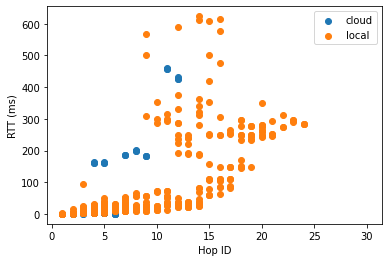

In [30]:
for location, ldf in results.groupby('location'):
    plt.scatter(ldf.hop_idx, ldf.probe_rtt_ms, label=location)
plt.xlabel("Hop ID")
plt.ylabel("RTT (ms)")
plt.legend(loc='best')

(array([25., 13., 14.,  0.,  1.,  0.,  0.,  0.,  0., 68.]),
 array([ 9. , 10.5, 12. , 13.5, 15. , 16.5, 18. , 19.5, 21. , 22.5, 24. ]),
 <BarContainer object of 10 artists>)

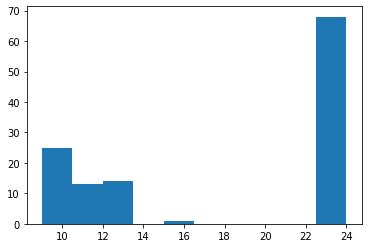

In [35]:
plt.hist(results[results.dest_ip == '146.231.128.43'].num_hops)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '32.0'),
  Text(1, 0, '2018.0'),
  Text(2, 0, '2152.0'),
  Text(3, 0, '3356.0'),
  Text(4, 0, '5713.0'),
  Text(5, 0, '6421.0'),
  Text(6, 0, '11537.0'),
  Text(7, 0, '15169.0'),
  Text(8, 0, '20115.0'),
  Text(9, 0, '37271.0'),
  Text(10, 0, '37520.0')])

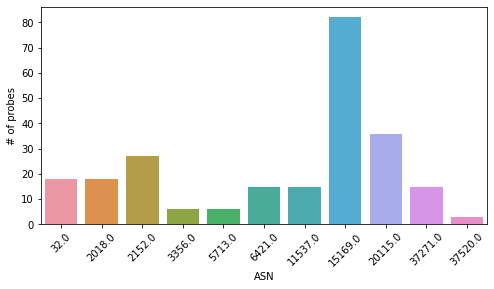

In [58]:
import seaborn as sns
plt.figure(figsize=(8,4))
by_asn = results.groupby('probe_asn', as_index=False).count()
by_asn = by_asn.rename(columns={'probe_rtt_ms': 'num_probes'})
sns.barplot(data=by_asn, x='probe_asn', y='num_probes')
plt.ylabel("# of probes")
plt.xlabel("ASN")
plt.xticks(rotation=45)

In [63]:
asndb = pyasn.pyasn('../ipasn.db')
asndb

pyasn(ipasndb:'../ipasn.db'; asnames:'None') - 1025620 prefixes

In [65]:
asndb.get_as_name(20115)

Exception: Autonomous system names not loaded during initialization